In [1]:
import yfinance as yf

## Tablas de Muestra

Vamos a traer algunas tablas de yahho finance para poder analizarlas y de acuerdo a ello automatizar el analisis de las 500 empresas.

In [3]:
############################
#web scraping
############################
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import pandas as pd

site = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
header = {'User-Agent': 'Mozilla/5.0'}
req = Request(site,headers=header)
page = urlopen(req)
soup = BeautifulSoup(page, "lxml")
table = soup.find('table', id="constituents")

#column "TICKER"
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].get_text()
    tickers.append(ticker)

ticker = [n.replace('\n','').replace('.','-') for n in tickers]

#column "COMPANY"
company = []
for row in table.findAll('tr')[1:]:
    name = row.findAll('td')[1].get_text()
    company.append(name)

company = [n.replace('\n', '') for n in company]

#column "SECTOR"
sector = []
for row in table.findAll('tr')[1:]:
    name = row.findAll('td')[3].get_text()
    sector.append(name)

sector = [n.replace('\n', '') for n in sector]

#column "INDUSTRY"
industry = []
for row in table.findAll('tr')[1:]:
    name = row.findAll('td')[4].get_text()
    industry.append(name)

industry = [n.replace('\n', '') for n in industry]

In [4]:
df_SP = pd.DataFrame()
df_SP['TICKER'] = ticker
df_SP['COMPANY'] = company
df_SP['SECTOR'] = sector
df_SP['INDUSTRY'] = industry
df_SP.head()

,TICKER,COMPANY,SECTOR,INDUSTRY
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment


analizamos las primeras 3 empresas

In [9]:
#exportamos los datos en un csv
df_SP.to_csv('sp500.csv', index=False)
ticker = ['MMM','ABBV','ABMD']
for tck in ticker:
    df = yf.download(tck, start='2000-01-01')
    df.reset_index(inplace=True)
    name_tck = tck.lower()
    df.to_csv(name_tck + '.csv', index=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
import pandas as pd
#carga de archivos de prueba
df_sp500 = pd.read_csv('sp500.csv')
df_mmm = pd.read_csv('mmm.csv')
df_abbv = pd.read_csv('abbv.csv')
df_abmd = pd.read_csv('abmd.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Volatilidad

referencia: https://www.gestionpasiva.com/la-volatilidad-como-se-calcula/

Lo primero que generalizaremos es el cálculo de la volatilidad, ya que a menor volatilidad la rentabilidad de la empresa es más estable, por lo que una empresa estaría segura de poder invertir en ella de mediano a largo plazo.

Para ello usaremos el ticker: MMM para los siguientes calculos

In [193]:
AdjClose_mmm = df_mmm['Adj Close']
dfp = pd.DataFrame()
dfp['Fecha'] = df_mmm['Date']
dfp['Ajuste_Cierre'] = AdjClose_mmm

Dividimos el calculo por años para poder hallar la rentabilidad anual (ROI)

In [194]:
lista = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
Roi = []
for m in lista:
    df = dfp.loc[(dfp['Fecha']>= str(m) + '-01-01') & (dfp['Fecha']<= str(m) + '-12-31' )]
    df.reset_index(inplace=True, drop=True)
    first = df.loc[0,['Ajuste_Cierre']]
    last = df.loc[df.shape[0] - 1,['Ajuste_Cierre']]
    rentabilidad_anual = ((last - first)/first )*100
    roi = round(float(rentabilidad_anual),2)
    Roi.append(roi)

df = pd.DataFrame()
df['AÑO'] = lista
df['ROI (%)'] = Roi

df.head(3)

,AÑO,ROI (%)
0,2000,30.93
1,2001,1.30
2,2002,7.39


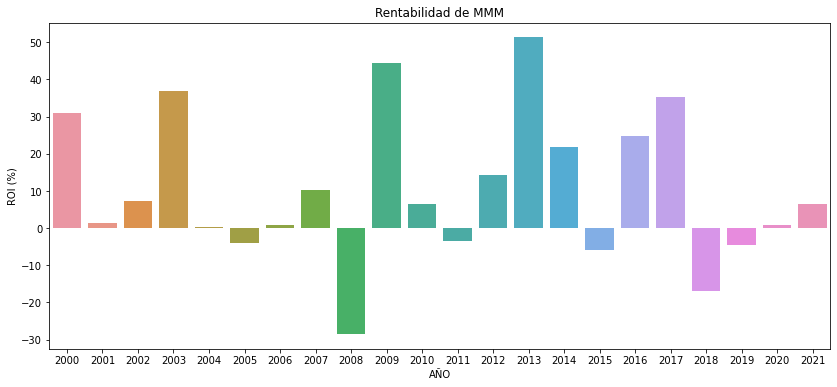

In [204]:
plt.figure(figsize=(14,6))
plt.title('Rentabilidad de MMM')
sns.barplot(data = df, x='AÑO', y='ROI (%)')
plt.show()

In [171]:
#desviación tipica de la rentabilidad anualizada
volatilidad = df['ROI (%)'].std()
print('volatilidad: ' , round(volatilidad,2),'%')

volatilidad:  20.08 %
